<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/ContinuityAndDifferentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continuity and Differentiation

## Limits and Continuity
Let $f: D \rightarrow \mathbb{R}$ be a real-valued function on $D \subseteq \mathbb{R}^{d}$. Then $f$ is said to have a limit $L \in \mathbb{R}$ as $\mathbf{x}$ approaches a if: for any $\varepsilon>0$, there exists a $\delta>0$ such that $|f(\mathbf{x})-L|<\varepsilon$ for all $\mathbf{x} \in D \cap B_{\delta}(\mathbf{a}) \backslash\{\mathbf{a}\}$. This is written as
$$
\lim _{\mathbf{x} \rightarrow \mathbf{a}} f(\mathbf{x})=L
$$

Let $f: D \rightarrow \mathbb{R}$ be a real-valued function on $D \subseteq \mathbb{R}^{d}$. Then $f$ is said to be continuous at $\mathbf{a} \in D$ if
$$
\lim _{\mathbf{x} \rightarrow \mathbf{a}} f(\mathbf{x})=f(\mathbf{a})
$$

We explore these concepts in Python below. Consider the function
$$
f(x) = \frac{x^2 -1}{x-1}
$$

We use the sympy library to calculate the limit of this function as $x$ approaches 1. Observe the function is discontinuous at this point. The results are plotted below.

Limit of f(x) as x approaches 1: 2
f(1): nan
The function is not continuous at x=1


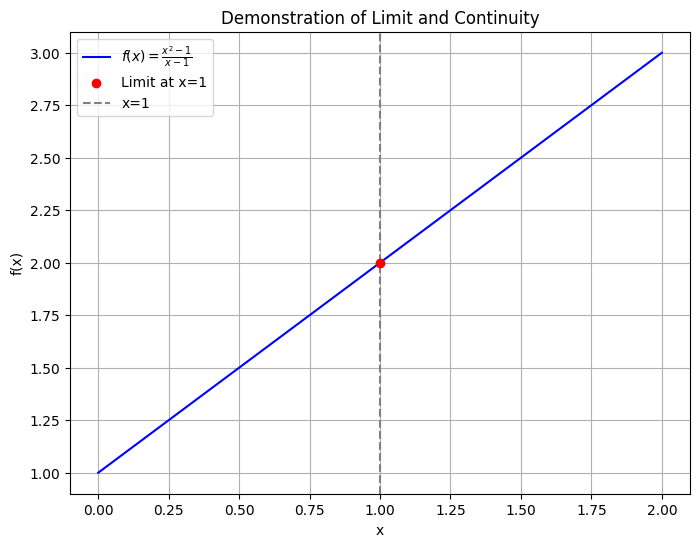

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and function
x = sp.symbols('x')
# Example function f(x) = (x^2 - 1)/(x - 1) has a removable discontinuity at x=1
f = (x**2 - 1) / (x - 1)

# Compute the limit of f(x) as x approaches 1
limit_at_1 = sp.limit(f, x, 1)
print(f"Limit of f(x) as x approaches 1: {limit_at_1}")

# Check the continuity at x=1
f_at_1 = f.subs(x, 1)
print(f"f(1): {f_at_1}")

if limit_at_1 == f_at_1:
    print("The function is continuous at x=1")
else:
    print("The function is not continuous at x=1")

# Plot the function around x=1
def f_numpy(x):
    return np.where(x != 1, (x**2 - 1)/(x - 1), limit_at_1)  # Removable discontinuity at x=1

# Create values for plotting
x_vals = np.linspace(0, 2, 400)
y_vals = f_numpy(x_vals)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x)=\frac{x^2 - 1}{x - 1}$', color='blue')
plt.scatter(1, limit_at_1, color='red', zorder=5, label='Limit at x=1')
plt.title('Demonstration of Limit and Continuity')
plt.axvline(x=1, color='gray', linestyle='--', label='x=1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Derivatives
The derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to another variable. We begin by reviewing the sigle-variable case.

Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}$ and let $x_{0} \in D$ be an interior point of $D .$ The derivative of $f$ at $x_{0}$ is
$$
f^{\prime}\left(x_{0}\right)=\frac{\mathrm{d} f\left(x_{0}\right)}{\mathrm{d} x}=\lim _{h \rightarrow 0} \frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}
$$
provided the limit exists.

For functions of several variables, we have the following generalization. As before, we let $\mathbf{e}_{i} \in \mathbb{R}^{d}$ be the $i$-th standard basis vector.

Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$ and let $\mathbf{x}_{0} \in D$ be an interior point of $D .$ The partial derivative of $f$ at $\mathbf{x}_{0}$ with respect to $x_{i}$ is
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{i}}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{e}_{i}\right)-f\left(\mathbf{x}_{0}\right)}{h}
$$
provided the limit exists. If $\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{i}}$ exists and is continuous in an open ball around $\mathbf{x}_{0}$ for all $i$, then we say that $f$ continuously differentiable at $\mathbf{x}_{0}$.

We can use sympy to calculate derivatives. We begin with the single-variable case by calculating the derivative of
$$
f(x) = e^xsin(x)
$$

In [17]:
x = sp.Symbol('x')
f = sp.exp(x)*sp.sin(x)
derivative_f = f.diff(x)
print('The derivative is:\n')
derivative_f

The derivative is:



 x           x       
ℯ ⋅sin(x) + ℯ ⋅cos(x)

The same process can be applied to functions of multiple variables.

In [20]:
x, y, z = sp.symbols('x y z', real=True)
f = 2*x*y + x*sp.cos(z) + x**4 + z**3*y
print('The derivative is:\n')
sp.diff(f, x)

The derivative is:



   3               
4⋅x  + 2⋅y + cos(z)

###  Jacobian
Let $\mathbf{f}=\left(f_{1}, \ldots, f_{m}\right): D \rightarrow \mathbb{R}^{m}$ where $D \subseteq \mathbb{R}^{d}$ and let $\mathbf{x}_{0} \in D$ be an interior point of $D$ where $\frac{\partial f_{j}\left(\mathbf{x}_{0}\right)}{\partial x_{i}}$ exists for all $i, j .$ The Jacobian of $\mathbf{f}$ at $\mathbf{x}_{0}$ is the $d \times m$ matrix
$$
\mathbf{J}_{\mathbf{f}}\left(\mathbf{x}_{0}\right)=\left(\begin{array}{ccc}
\frac{\partial f_{1}\left(\mathbf{x}_{0}\right)}{\partial x_{1}} & \ldots & \frac{\partial f_{1}\left(\mathbf{x}_{0}\right)}{\partial x_{d}} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_{m}\left(\mathbf{x}_{0}\right)}{\partial x_{1}} & \ldots & \frac{\partial f_{m}\left(\mathbf{x}_{0}\right)}{\partial x_{d}}
\end{array}\right)
$$
For a real-valued function $f: D \rightarrow \mathbb{R}$, the Jacobian reduces to the row vector
$$
\mathbf{J}_{f}\left(\mathbf{x}_{0}\right)=\nabla f\left(\mathbf{x}_{0}\right)^{T}
$$
where the vector
$$
\nabla f\left(\mathbf{x}_{0}\right)=\left(\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{1}}, \ldots, \frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{d}}\right)^{T}
$$
is the gradient of $f$ at $\mathbf{x}_{0}$.

### Directional Derivative
Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$, let $\mathbf{x}_{0} \in D$ be an interior point of $D$ and let $\mathbf{v} \in \mathbb{R}^{d}$ be a unit vector. The directional derivative of $f$ at $\mathbf{x}_{0}$ in the direction $\mathbf{v}$ is
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{v}}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{v}\right)-f\left(\mathbf{x}_{0}\right)}{h}
$$
provided the limit exists.
Note that taking $\mathbf{v}=\mathbf{e}_{i}$ recovers the $i$-th partial derivative
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{e}_{i}}=\lim _{h \rightarrow 0} \frac{f\left(\mathbf{x}_{0}+h \mathbf{e}_{i}\right)-f\left(\mathbf{x}_{0}\right)}{h}=\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial x_{i}}
$$
Conversely, a general directional derivative can be expressed in terms of the partial derivatives.

Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d}$, let $\mathbf{x}_{0} \in D$ be an interior point of $D$ and let $\mathbf{v} \in \mathbb{R}^{d}$ be a unit vector. Assume that $f$ is continuously differentiable at $\mathbf{x}_{0}$. Then the directional derivative of $f$ at $\mathbf{x}_{0}$ in the direction $\mathbf{v}$ is given by
$$
\frac{\partial f\left(\mathbf{x}_{0}\right)}{\partial \mathbf{v}}=\mathbf{J}_{f}\left(\mathbf{x}_{0}\right) \mathbf{v}=\nabla f\left(\mathbf{x}_{0}\right)^{T} \mathbf{v}
$$

## Taylor's Theorem
Taylor’s theorem gives an approximation of a differentiable function around a given point by a polynomial. We begin with the single-variable case.

Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}$. Suppose $f$ has a $m$ times continuous derivative on $[a, b]$. Then
$$
f(b)=f(a)+(b-a) f^{\prime}(a)+\frac{1}{2}(b-a)^{2} f^{\prime \prime}(a)+\ldots+\frac{(b-a)^{m-1}}{(m-1) !} f^{(m-1)}(a)+R_{m}
$$
where $R_{m}=\frac{(b-a)^{m}}{(m) !} f^{(m)}(a+\theta(b-a))$ for some $0<\theta< 1 .$ In particular, for $m=2$, we have
$$
f(b)=f(a)+(b-a) f^{\prime}(a)+\frac{1}{2}(b-a)^{2} f^{\prime \prime}(\xi)
$$
for some $a<\xi<b$.

In general,


Let $f: D \rightarrow \mathbb{R}$ where $D \subseteq \mathbb{R}^{d} .$ Let $\mathbf{x}_{0} \in D$ and $\delta>0$ be such that $B_{\delta}\left(\mathbf{x}_{0}\right) \subseteq D .$ If $f$ is three times continuously differentiable on $B_{\delta}\left(\mathbf{x}_{0}\right)$, then for any $\mathbf{x} \in B_{\delta}\left(\mathbf{x}_{0}\right)$
$$
f(\mathbf{x})=f\left(\mathbf{x}_{0}\right)+\nabla f\left(\mathbf{x}_{0}\right)^{T} \mathbf{p}+\frac{1}{2} \mathbf{p}^{T} \mathbf{H}_{f}\left(\mathbf{x}_{0}\right) \mathbf{p}+O\left(\mid \mathbf{p} \|^{3}\right)
$$
where $\mathbf{p}=\mathbf{x}-\mathbf{x}_{0}$
If $f$ is twice continuously differentiable on $B_{\delta}\left(\mathbf{x}_{0}\right)$, then for any $\mathbf{x} \in B_{\delta}\left(\mathbf{x}_{0}\right)$
$$
f(\mathbf{x})=f\left(\mathbf{x}_{0}\right)+\nabla f\left(\mathbf{x}_{0}\right)^{T} \mathbf{p}+\frac{1}{2} \mathbf{p}^{T} \mathbf{H}_{f}\left(\mathbf{x}_{0}+\xi \mathbf{p}\right) \mathbf{p}
$$
for some $\xi \in(0,1)$, where $\mathbf{p}=\mathbf{x}-\mathbf{x}_{0}$

Below we demonstrate Taylor's theorem by approximating $sin(x)$ using an increasing number of terms in the Taylor series.

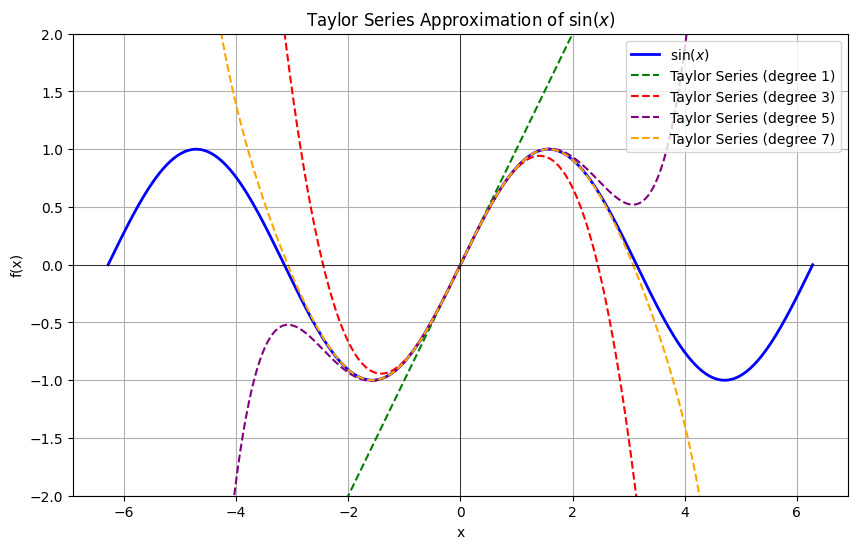

In [22]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and the function
x = sp.symbols('x')
f = sp.sin(x)  # Example function: sin(x)

# Compute the Taylor series expansion of f(x) around x=0 (Maclaurin series)
def taylor_series(f, x0, n):
    return sp.series(f, x, x0, n+1).removeO()

# Convert sympy expression to a numpy function for plotting
def sympy_to_numpy(expr):
    return sp.lambdify(x, expr, 'numpy')

# Plot the original function and its Taylor series approximation
x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
f_numpy = sympy_to_numpy(f)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_numpy(x_vals), label=r'$\sin(x)$', color='blue', linewidth=2)

# Plot Taylor approximations of various degrees
colors = ['green', 'red', 'purple', 'orange']
for i, degree in enumerate([1, 3, 5, 7]):  # Increasing degrees of approximation
    taylor_poly = taylor_series(f, 0, degree)
    taylor_numpy = sympy_to_numpy(taylor_poly)

    plt.plot(x_vals, taylor_numpy(x_vals), label=f'Taylor Series (degree {degree})', color=colors[i], linestyle='--')

# Plot settings
plt.ylim(-2,2)
plt.title('Taylor Series Approximation of $\\sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()
